<center><bold>Eindopdracht voor computer vision, binaire classificatie van hersenscans</bold></center>

In [7]:
from sklearn import svm
from skimage.color import rgb2gray
from skimage.transform import resize
from os import listdir
from os.path import isfile, join
from random import shuffle, seed,randrange
import matplotlib.pyplot as plt

yespath = '..\\data\\yes'
yesfiles = [f for f in listdir(yespath) if isfile(join(yespath, f))]

x = []
y = []

for file in yesfiles:
    img = plt.imread(f"..\\data\\yes\\{file}")
    img = resize(img, (28, 32,3),
                 anti_aliasing=True)
    x.append(rgb2gray(img).flatten())
    y.append('yes')


nopath = '..\\data\\no'
nofiles = [f for f in listdir(nopath) if isfile(join(nopath, f))]

for file in nofiles:
    img = plt.imread(f"..\\data\\no\\{file}")
    img = resize(img, (28, 32,3),
                 anti_aliasing=True)
    x.append(rgb2gray(img).flatten())
    y.append('no')


z = list(zip(x, y))  # zip so it stays together during shuffle
seed(7577947579)
shuffle(z)

x, y = zip(*z)


In [23]:
from sklearn import metrics
Svm = svm.SVC(gamma= 1,C=100)
Svm.fit(x,y)

yespath = '..\\test\\yes'
yesfiles = [f for f in listdir(yespath) if isfile(join(yespath, f))]

x_test = []
y_test = []
x_image = []
for file in yesfiles:
    img = plt.imread(f"..\\test\\yes\\{file}")
    img = resize(img, (28, 32,3),
                 anti_aliasing=True)
    x_test.append(rgb2gray(img).flatten())
    y_test.append('yes')
    x_image.append(img)


nopath = '..\\test\\no'
nofiles = [f for f in listdir(nopath) if isfile(join(nopath, f))]

for file in nofiles:
    img = plt.imread(f"..\\test\\no\\{file}")
    img = resize(img, (28, 32,3),
                 anti_aliasing=True)
    x_test.append(rgb2gray(img).flatten())
    y_test.append('no')
    x_image.append(img)


prediction = Svm.predict(x_test)
evaluation = metrics.accuracy_score(y_test,prediction)
print(evaluation)






0.93


In [9]:
def show_res(img,  res):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))
    ax.imshow(img, cmap='gray')
    if(res == 'yes'):
        ax.set_title('tumor', fontsize=10)
    elif(res == 'no'):
        ax.set_title('healty', fontsize=10)

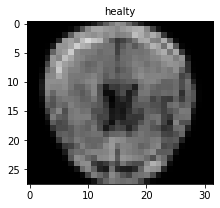

In [22]:
select = randrange(0,200)
show_res(x_image[select],prediction[select])